In [1]:
## Question 2 book csv file##

In [2]:
## Revannath Jondhale

In [3]:
import pandas as pd

In [4]:
from mlxtend.frequent_patterns import apriori,association_rules

In [5]:
## import the data into the same 

In [6]:
book=pd.read_csv("C:/Users/hp/Desktop/Revannath Data Sci/Assignments/9-Association Rule/book.csv")

In [7]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [8]:
# Due to the given data already being in the form of binary we can directly apply the apriori algorithm

In [9]:
frequent_books = apriori(book,min_support = 0.045, max_len = 3,use_colnames = True)

In [10]:
frequent_books.describe()

,support
count,87.000000
mean,0.112845
std,0.074027
min,0.045500
25%,0.059000
50%,0.095000
75%,0.128250
max,0.431000


In [11]:
##Sorting

In [12]:
frequent_books.sort_values('support',ascending = False,inplace = True)

In [13]:
frequent_books

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
11,0.2560,"(ChildBks, CookBks)"
...,...,...
36,0.0465,"(RefBks, ItalCook)"
79,0.0465,"(RefBks, ItalCook, CookBks)"
56,0.0460,"(DoItYBks, ChildBks, ItalCook)"
47,0.0460,"(ChildBks, ItalCook, YouthBks)"


In [14]:
book_rules = association_rules(frequent_books,metric = "confidence", min_threshold = 0.8)

In [15]:
print(len(book_rules))

27


In [16]:
##redundant rules from the list of the rules

In [17]:
def to_list(i):
    return (sorted(list(i)))

In [18]:
ma_book = book_rules.antecedents.apply(to_list)+book_rules.consequents.apply(to_list)

In [19]:
ma_book

0        [ChildBks, RefBks, CookBks]
1        [CookBks, RefBks, ChildBks]
2                [ItalCook, CookBks]
3       [DoItYBks, GeogBks, CookBks]
4         [ArtBks, GeogBks, CookBks]
5        [ArtBks, DoItYBks, CookBks]
6      [GeogBks, YouthBks, ChildBks]
7       [GeogBks, YouthBks, CookBks]
8      [DoItYBks, YouthBks, CookBks]
9     [DoItYBks, YouthBks, ChildBks]
10       [GeogBks, RefBks, ChildBks]
11      [DoItYBks, RefBks, ChildBks]
12        [GeogBks, RefBks, CookBks]
13     [ChildBks, ItalCook, CookBks]
14       [DoItYBks, RefBks, CookBks]
15      [RefBks, YouthBks, ChildBks]
16       [ArtBks, YouthBks, CookBks]
17       [RefBks, YouthBks, CookBks]
18        [ArtBks, RefBks, ChildBks]
19      [GeogBks, ItalCook, CookBks]
20     [ItalCook, YouthBks, CookBks]
21     [DoItYBks, ItalCook, CookBks]
22       [ArtBks, ItalCook, CookBks]
23     [GeogBks, ItalCook, ChildBks]
24                 [ItalArt, ArtBks]
25       [ItalCook, RefBks, CookBks]
26      [ArtBks, ItalCook, ChildBks]
d

In [20]:
ma_book = ma_book.apply(sorted)

In [21]:
rules_sets = list(ma_book)

In [22]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [23]:
index_rules = []

In [25]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i)) ## copied from my movies

In [26]:
# get rules without any redudancy 

In [27]:
rules_no_redundancy  = book_rules.iloc[index_rules,:]

In [28]:
# Sorting them with respect to list and getting top 10 rules 

In [29]:
rules_no_redundancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(ItalArt),(ArtBks),0.0485,0.241,0.0485,1.0,4.149378,0.036812,inf
24,(ItalArt),(ArtBks),0.0485,0.241,0.0485,1.0,4.149378,0.036812,inf
20,"(ItalCook, YouthBks)",(CookBks),0.0590,0.431,0.0590,1.0,2.320186,0.033571,inf
13,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf
22,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.0,2.320186,0.032148,inf
19,"(ItalCook, GeogBks)",(CookBks),0.0640,0.431,0.0640,1.0,2.320186,0.036416,inf
21,"(DoItYBks, ItalCook)",(CookBks),0.0585,0.431,0.0585,1.0,2.320186,0.033287,inf
20,"(ItalCook, YouthBks)",(CookBks),0.0590,0.431,0.0590,1.0,2.320186,0.033571,inf
13,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf
2,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf


In [30]:
rules_no_redundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
18,"(RefBks, ArtBks)",(ChildBks),0.0895,0.423,0.0760,0.849162,2.007475,0.038142,3.825296
11,"(DoItYBks, RefBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323
21,"(DoItYBks, ItalCook)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf
19,"(ItalCook, GeogBks)",(CookBks),0.0640,0.431,0.0640,1.000000,2.320186,0.036416,inf
10,"(RefBks, GeogBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152
3,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
22,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf
24,(ItalArt),(ArtBks),0.0485,0.241,0.0485,1.000000,4.149378,0.036812,inf
4,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


In [31]:
# We got the best 26 rules which can be used for our improvements.

In [32]:
##potting

In [33]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Confidence')

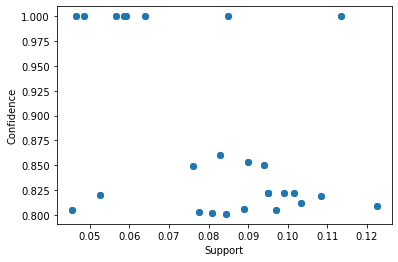

In [34]:
plt.scatter(rules_no_redundancy.support,rules_no_redundancy.confidence);plt.xlabel("Support");plt.ylabel("Confidence")